indicator that makes that 0:00 H3 bullish bar blue and red if bearish

#property indicator_chart_window
#property indicator_buffers 5
#property indicator_plots   1

#property indicator_type1   DRAW_COLOR_CANDLES
#property indicator_label1  "H3 00:00 Candle"
#property indicator_color1  clrBlue, clrRed

// =====================
// BUFFERS
// =====================
double OpenBuf[];
double HighBuf[];
double LowBuf[];
double CloseBuf[];
double ColorBuf[];

// =====================
// INIT
// =====================
int OnInit()
{
   SetIndexBuffer(0, OpenBuf,  INDICATOR_DATA);
   SetIndexBuffer(1, HighBuf,  INDICATOR_DATA);
   SetIndexBuffer(2, LowBuf,   INDICATOR_DATA);
   SetIndexBuffer(3, CloseBuf, INDICATOR_DATA);
   SetIndexBuffer(4, ColorBuf, INDICATOR_COLOR_INDEX);

   PlotIndexSetInteger(0, PLOT_DRAW_BEGIN, 0);
   PlotIndexSetInteger(0, PLOT_COLOR_INDEXES, 2);

   IndicatorSetString(INDICATOR_SHORTNAME, "H3 00:00 Bull/Bear Candle");

   return(INIT_SUCCEEDED);
}

// =====================
// CALCULATION
// =====================
int OnCalculate(
   const int rates_total,
   const int prev_calculated,
   const datetime &time[],
   const double &open[],
   const double &high[],
   const double &low[],
   const double &close[],
   const long &tick_volume[],
   const long &volume[],
   const int &spread[]
)
{
   // Only valid on H3
   if(_Period != PERIOD_H3)
      return(rates_total);

   int start = (prev_calculated > 0) ? prev_calculated - 1 : 0;

   for(int i = start; i < rates_total; i++)
   {
      // Copy price data
      OpenBuf[i]  = open[i];
      HighBuf[i]  = high[i];
      LowBuf[i]   = low[i];
      CloseBuf[i] = close[i];

      ColorBuf[i] = EMPTY_VALUE;

      MqlDateTime t;
      TimeToStruct(time[i], t);

      // Check H3 candle starting at 00:00
      if(t.hour == 0 && (t.hour % 3) == 0)
      {
         if(close[i] > open[i])
            ColorBuf[i] = 0; // Blue (bullish)
         else if(close[i] < open[i])
            ColorBuf[i] = 1; // Red (bearish)
      }
   }

   return(rates_total);
}


remove the grid of the chart
ChartSetInteger(0, CHART_SHOW_GRID, false); in OnInit()

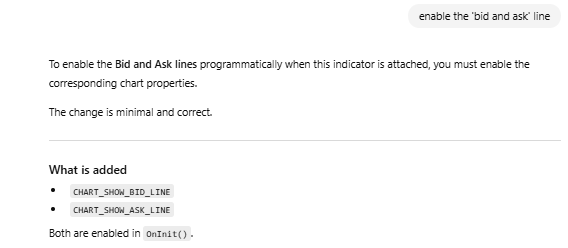

In [ ]:
#property indicator_chart_window
#property indicator_buffers 5
#property indicator_plots   1

#property indicator_type1   DRAW_COLOR_CANDLES
#property indicator_label1  "H3 00:00 Candle"
#property indicator_color1  clrBlue, clrRed

// =====================
// BUFFERS
// =====================
double OpenBuf[];
double HighBuf[];
double LowBuf[];
double CloseBuf[];
double ColorBuf[];

// =====================
// INIT
// =====================
int OnInit()
{
   // Chart visual settings
   ChartSetInteger(0, CHART_SHOW_GRID, false);
   ChartSetInteger(0, CHART_SHOW_BID_LINE, true);
   ChartSetInteger(0, CHART_SHOW_ASK_LINE, true);

   SetIndexBuffer(0, OpenBuf,  INDICATOR_DATA);
   SetIndexBuffer(1, HighBuf,  INDICATOR_DATA);
   SetIndexBuffer(2, LowBuf,   INDICATOR_DATA);
   SetIndexBuffer(3, CloseBuf, INDICATOR_DATA);
   SetIndexBuffer(4, ColorBuf, INDICATOR_COLOR_INDEX);

   PlotIndexSetInteger(0, PLOT_DRAW_BEGIN, 0);
   PlotIndexSetInteger(0, PLOT_COLOR_INDEXES, 2);

   IndicatorSetString(INDICATOR_SHORTNAME, "H3 00:00 Bull/Bear Candle");

   return(INIT_SUCCEEDED);
}

// =====================
// CALCULATION
// =====================
int OnCalculate(
   const int rates_total,
   const int prev_calculated,
   const datetime &time[],
   const double &open[],
   const double &high[],
   const double &low[],
   const double &close[],
   const long &tick_volume[],
   const long &volume[],
   const int &spread[]
)
{
   if(_Period != PERIOD_H3)
      return(rates_total);

   int start = (prev_calculated > 0) ? prev_calculated - 1 : 0;

   for(int i = start; i < rates_total; i++)
   {
      OpenBuf[i]  = open[i];
      HighBuf[i]  = high[i];
      LowBuf[i]   = low[i];
      CloseBuf[i] = close[i];

      ColorBuf[i] = EMPTY_VALUE;

      MqlDateTime t;
      TimeToStruct(time[i], t);

      // H3 candle starting at 00:00
      if(t.hour == 0)
      {
         if(close[i] > open[i])
            ColorBuf[i] = 0; // Bullish (Blue)
         else if(close[i] < open[i])
            ColorBuf[i] = 1; // Bearish (Red)
      }
   }

   return(rates_total);
}


Use MQL5, do not ever mix MT4-style functions in MT5, do not ever use the MT4-style helper, 

Make an MT5 indicator that draws a box (range size) at the first bar from 0:00 am time, extend this box 4 bars to the right. Use MQL5, do not ever mix MT4-style functions in MT5, do not ever use the MT4-style helper, 

#property indicator_chart_window
#property indicator_buffers 0

#include <ChartObjects\ChartObjectsShapes.mqh>

input color BoxColor = clrYellow;        // Color of the box
input int BoxWidth = 2;                  // Width of the box border
input int ExtendBars = 4;                // How many bars to extend to the right

// Global variables
CChartObjectRect box;
datetime lastDate = 0;

//+------------------------------------------------------------------+
//| Custom indicator iteration function                               |
//+------------------------------------------------------------------+
int OnCalculate(const int rates_total,
                const int prev_calculated,
                const int begin,
                const double &price[])
{
    if(rates_total < 1)
        return(0);

    // Get the current bar's date (YYYYMMDD)
    datetime barTime = iTime(_Symbol, PERIOD_CURRENT, 0);
    MqlDateTime dt;
    TimeToStruct(barTime, dt);

    // Only once per new day
    if(dt.hour == 0 && dt.min == 0 && lastDate != dt.day)
    {
        lastDate = dt.day;

        // Determine high and low of the first bar
        double barHigh = iHigh(_Symbol, PERIOD_CURRENT, 0);
        double barLow  = iLow(_Symbol, PERIOD_CURRENT, 0);

        // Delete previous box if exists
        if(box.Name() != "")
            box.Delete();

        // Create a new rectangle
        string boxName = "MidnightBox_" + IntegerToString(dt.day);
        if(!box.Create(0, boxName, 0, 0, 0))
        {
            Print("Failed to create box!");
            return(prev_calculated);
        }

        // Set rectangle properties
        box.SetInteger(OBJPROP_COLOR, BoxColor);
        box.SetInteger(OBJPROP_WIDTH, BoxWidth);
        box.SetInteger(OBJPROP_STYLE, STYLE_SOLID);
        box.SetInteger(OBJPROP_RAY_RIGHT, false);

        // Set coordinates: start from the current bar, extend to the right
        int startBar = 0;
        int endBar = MathMin(rates_total - 1, startBar + ExtendBars);

        box.SetInteger(OBJPROP_TIME1, iTime(_Symbol, PERIOD_CURRENT, startBar));
        box.SetDouble(OBJPROP_PRICE1, barHigh);

        box.SetInteger(OBJPROP_TIME2, iTime(_Symbol, PERIOD_CURRENT, endBar));
        box.SetDouble(OBJPROP_PRICE2, barLow);
    }

    return(rates_total);
}
